In [1]:
from decision_tree import *
import numpy as np
import random
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import sklearn.datasets

This notebook contains demonstrations for Decision Tree, Bagging, Random Forest, Adaboost, Gradient Boost as written in the decsion_tree.py file for classfication and regression. 

For regression I'll be using the <b>California Housing Dataset</b> (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html), and for classification I'll be using the <b>Banknote Authentication Dataset</b> (UCI ML Repository, https://archive.ics.uci.edu/dataset/267/banknote+authentication).



<b> This is just a demo notebook and the attempt is not to get the maximum performance. </b>

## Regression

### Loading the dataset

In [33]:
X_reg, y_reg = sklearn.datasets.fetch_california_housing(return_X_y=True)
# The actual dataset is quite big, so I'll only use 2000 examples
X_reg, y_reg = X_reg[:2000], y_reg[:2000]
print(f"X_reg shape: {X_reg.shape}")
print(f"y_reg shape: {y_reg.shape}")

X_reg shape: (2000, 8)
y_reg shape: (2000,)


Splitting the dataset into training and testing sets (80:20 split)

In [38]:
random_indices = list(range(X_reg.shape[0]))
random.shuffle(random_indices)

X_reg_train = X_reg[random_indices][:1600]
y_reg_train = y_reg[random_indices][:1600]

X_reg_test = X_reg[random_indices][1600:]
y_reg_test =  y_reg[random_indices][1600:]

print(f"X_reg_train shape: {X_reg_train.shape}")
print(f"y_reg_train shape: {y_reg_train.shape}")
print(f"X_reg_test shape: {X_reg_test.shape}")
print(f"y_reg_test shape: {y_reg_test.shape}")

X_reg_train shape: (1600, 8)
y_reg_train shape: (1600,)
X_reg_test shape: (400, 8)
y_reg_test shape: (400,)


In [39]:
DTR = DecisionTree(X_reg_train, y_reg_train, task='regression')

In [40]:
DTR.build_tree(max_depth=5, print_opt=True)

 Depth 0,Root: Split on feature: 0
- Depth 1,Left: Split on feature: 0
-- Depth 2,Left: Split on feature: 5
--- Depth 3,Left: Split on feature: 6
---- Depth 4,Left: Split on feature: 4
     ----- Depth 5, Left leaf with indices [367]
     ----- Depth 5, Right leaf with indices [  28   38   44   68   80   81   87   99  128  174  194  201  231  233
  235  243  260  261  269  271  280  286  292  294  296  311  321  337
  342  374  393  396  411  420  432  448  455  459  470  471  497  536
  551  554  568  575  577  583  617  623  625  633  653  677  683  689
  704  709  714  746  759  763  776  778  779  793  805  830  870  873
  892  909  961  975  978  989  992  996 1021 1032 1035 1053 1059 1062
 1064 1067 1081 1084 1098 1106 1116 1118 1154 1159 1171 1206 1218 1249
 1278 1289 1301 1313 1315 1327 1337 1343 1355 1356 1374 1381 1388 1393
 1407 1413 1437 1464 1473 1491 1506 1530 1553 1555 1568 1571 1595]
---- Depth 4,Right: Split on feature: 6
     ----- Depth 5, Left leaf with indices [  1

In [41]:
DTR_train_error = DTR.measure_error(DTR.tree, X_reg_train, y_reg_train)
DTR_test_error = DTR.measure_error(DTR.tree, X_reg_test, y_reg_test)

print("Mean squared error")
print(f"MSE on train set: {DTR_train_error}")
print(f"MSE on test set: {DTR_test_error}")

Mean squared error
MSE on train set: 0.19237731598631663
MSE on test set: 0.2908959857309358


Looks like high variance!

## Bagging

In [7]:
BR = RandomForest(X_reg_train, y_reg_train, 'regression')

Bagging can be achieved using the RandomForest class by considering all the features at every split. This is achieved by setting the <i>num_features</i> parameter to 'all'.

In [8]:
BR.build_ensemble(num_trees=100, max_depth=5, num_features='all')

Bulding Tree 1.......
Bulding Tree 2.......
Bulding Tree 3.......
Bulding Tree 4.......
Bulding Tree 5.......
Bulding Tree 6.......
Bulding Tree 7.......
Bulding Tree 8.......
Bulding Tree 9.......
Bulding Tree 10.......
Bulding Tree 11.......
Bulding Tree 12.......
Bulding Tree 13.......
Bulding Tree 14.......
Bulding Tree 15.......
Bulding Tree 16.......
Bulding Tree 17.......
Bulding Tree 18.......
Bulding Tree 19.......
Bulding Tree 20.......
Bulding Tree 21.......
Bulding Tree 22.......
Bulding Tree 23.......
Bulding Tree 24.......
Bulding Tree 25.......
Bulding Tree 26.......
Bulding Tree 27.......
Bulding Tree 28.......
Bulding Tree 29.......
Bulding Tree 30.......
Bulding Tree 31.......
Bulding Tree 32.......
Bulding Tree 33.......
Bulding Tree 34.......
Bulding Tree 35.......
Bulding Tree 36.......
Bulding Tree 37.......
Bulding Tree 38.......
Bulding Tree 39.......
Bulding Tree 40.......
Bulding Tree 41.......
Bulding Tree 42.......
Bulding Tree 43.......
Bulding Tree 44.....

In [9]:
BR_train_error = BR.measure_error(BR.ensemble, X_reg_train, y_reg_train)
BR_test_error = BR.measure_error(BR.ensemble, X_reg_test, y_reg_test)

print("Mean squared error")
print(f"MSE on train set: {BR_train_error}")
print(f"MSE on test set: {BR_test_error}")

Mean squared error
MSE on train set: 0.15614278456265684
MSE on test set: 0.1878145004559861


 Train and test errors are quite close. No high variance problem.

### Random Forest

In [10]:
RFR = RandomForest(X_reg_train, y_reg_train, 'regression')

In [11]:
RFR.build_ensemble(num_trees=200, num_features=4, max_depth=5)

Bulding Tree 1.......
Bulding Tree 2.......
Bulding Tree 3.......
Bulding Tree 4.......
Bulding Tree 5.......
Bulding Tree 6.......
Bulding Tree 7.......
Bulding Tree 8.......
Bulding Tree 9.......
Bulding Tree 10.......
Bulding Tree 11.......
Bulding Tree 12.......
Bulding Tree 13.......
Bulding Tree 14.......
Bulding Tree 15.......
Bulding Tree 16.......
Bulding Tree 17.......
Bulding Tree 18.......
Bulding Tree 19.......
Bulding Tree 20.......
Bulding Tree 21.......
Bulding Tree 22.......
Bulding Tree 23.......
Bulding Tree 24.......
Bulding Tree 25.......
Bulding Tree 26.......
Bulding Tree 27.......
Bulding Tree 28.......
Bulding Tree 29.......
Bulding Tree 30.......
Bulding Tree 31.......
Bulding Tree 32.......
Bulding Tree 33.......
Bulding Tree 34.......
Bulding Tree 35.......
Bulding Tree 36.......
Bulding Tree 37.......
Bulding Tree 38.......
Bulding Tree 39.......
Bulding Tree 40.......
Bulding Tree 41.......
Bulding Tree 42.......
Bulding Tree 43.......
Bulding Tree 44.....

In [12]:
RFR_train_error = RFR.measure_error(RFR.ensemble, X_reg_train, y_reg_train)
RFR_test_error = RFR.measure_error(RFR.ensemble, X_reg_test, y_reg_test)

print("Mean squared error")
print(f"MSE on train set: {RFR_train_error}")
print(f"MSE on test set: {RFR_test_error}")

Mean squared error
MSE on train set: 0.16153345388078294
MSE on test set: 0.1796994985460148


### AdaBoost

In [13]:
ABR = AdaBoostRegressor(X_reg_train, y_reg_train)

In [18]:
ABR.train(n_learners=150, depth=4, store_error=True, X_cv=X_reg_test, y_cv=y_reg_test)

Building learner: 1...
Building learner: 2...
Building learner: 3...
Building learner: 4...
Building learner: 5...
Building learner: 6...
Building learner: 7...
Building learner: 8...
Building learner: 9...
Building learner: 10...
Building learner: 11...
Building learner: 12...
Building learner: 13...
Building learner: 14...
Building learner: 15...
Building learner: 16...
Building learner: 17...
Building learner: 18...
Building learner: 19...
Building learner: 20...
Building learner: 21...
Building learner: 22...
Building learner: 23...
Building learner: 24...
Building learner: 25...
Building learner: 26...
Building learner: 27...
Building learner: 28...
Building learner: 29...
Building learner: 30...
Building learner: 31...
Building learner: 32...
Building learner: 33...
Building learner: 34...
Building learner: 35...
Building learner: 36...
Building learner: 37...
Building learner: 38...
Building learner: 39...
Building learner: 40...
Building learner: 41...
Building learner: 42...
B

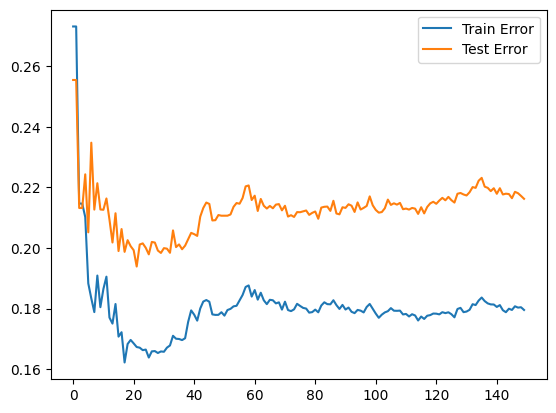

In [26]:
plt.plot(ABR.train_error_hist, label="Train Error")
plt.plot(ABR.cv_error_hist, label="Test Error")
plt.legend()

In [20]:
ABR_train_error = ABR.measure_error(ABR.learners, X_reg_train, y_reg_train)
ABR_test_error = ABR.measure_error(ABR.learners, X_reg_test, y_reg_test)

print("Mean squared error")
print(f"MSE on train set: {ABR_train_error}")
print(f"MSE on test set: {ABR_test_error}")

Mean squared error
MSE on train set: 0.17955528327907
MSE on test set: 0.2162268651321871


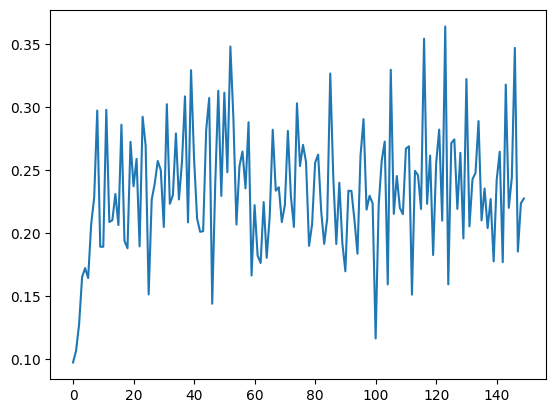

In [72]:
plt.plot(ABR.model_error_hist)

### GradientBoost

In [42]:
GBR = GradientBoostRegressor(X_reg_train, y_reg_train)

In [ ]:
GBR.train(learning_rate=0.1, n_trees=200, max_depth=5, store_hist=True, X_cv=X_reg_test, y_cv=y_reg_test)

Building tree: 1....
Building tree: 2....
Building tree: 3....
Building tree: 4....
Building tree: 5....
Building tree: 6....
Building tree: 7....
Building tree: 8....
Building tree: 9....
Building tree: 10....
Building tree: 11....
Building tree: 12....
Building tree: 13....
Building tree: 14....
Building tree: 15....
Building tree: 16....
Building tree: 17....
Building tree: 18....
Building tree: 19....
Building tree: 20....
Building tree: 21....
Building tree: 22....
Building tree: 23....
Building tree: 24....
Building tree: 25....
Building tree: 26....
Building tree: 27....
Building tree: 28....
Building tree: 29....
Building tree: 30....
Building tree: 31....
Building tree: 32....
Building tree: 33....
Building tree: 34....
Building tree: 35....
Building tree: 36....
Building tree: 37....
Building tree: 38....
Building tree: 39....
Building tree: 40....
Building tree: 41....
Building tree: 42....
Building tree: 43....
Building tree: 44....
Building tree: 45....
Building tree: 46..

In [ ]:
plt.plot(GBR.train_error_hist, label="Train Error")
plt.plot(GBR.cv_error_hist, label="Test Error")
plt.legend()

In [ ]:
GBR_train_error = GBR.compute_error(X_reg_train, y_reg_train, GBR.trees)
GBR_test_error = GBR.compute_error(X_reg_test, y_reg_test, GBR.trees)

print("Mean squared error")
print(f"MSE on train set: {GBR_train_error}")
print(f"MSE on test set: {GBR_test_error}")

## Classification

### Loading the dataset

In [2]:
file = 'datasets/BankNoteAuthentication.csv'
X_class = np.genfromtxt(file, delimiter=',', usecols=(0,1,2,3), skip_header=1)
y_class = np.genfromtxt(file, delimiter=',', usecols=4, skip_header=1)

print(f"X_class shape: {X_class.shape}")
print(f"y_class shape: {y_class.shape}")

X_class shape: (1372, 4)
y_class shape: (1372,)


In [23]:
random_indices_2 = list(range(X_class.shape[0]))
random.shuffle(random_indices_2)

X_class_train = X_class[random_indices_2][:1098]
y_class_train = y_class[random_indices_2][:1098]

X_class_test = X_class[random_indices_2][1098:]
y_class_test =  y_class[random_indices_2][1098:]

print(f"X_class_train shape: {X_class_train.shape}")
print(f"y_class_train shape: {y_class_train.shape}")
print(f"X_class_test shape: {X_class_test.shape}")
print(f"y_class_test shape: {y_class_test.shape}")

X_class_train shape: (1098, 4)
y_class_train shape: (1098,)
X_class_test shape: (274, 4)
y_class_test shape: (274,)


### Decision Tree

In [24]:
DTC = DecisionTree(X_class_train, y_class_train, 'classification')

In [25]:
DTC.build_tree(max_depth=10)

 Depth 0,Root: Split on feature: 0
- Depth 1,Left: Split on feature: 1
-- Depth 2,Left: Split on feature: 0
--- Depth 3,Left: Split on feature: 2
    ---- Depth 4, Left leaf with indices [   1    5    7   14   29   37   48   55   58   60   66   70   71   73
   74   79   80   84   86   92   94  103  107  109  110  113  117  122
  125  134  150  158  160  167  171  175  182  184  186  189  195  196
  197  199  202  213  214  217  228  229  253  256  257  258  259  263
  267  269  278  279  283  285  286  287  292  295  310  312  317  318
  322  323  327  328  332  336  338  342  344  348  349  352  353  362
  365  368  370  382  388  389  390  398  399  400  406  407  409  410
  412  415  416  418  422  426  430  436  437  445  449  450  456  466
  468  481  484  487  491  492  494  498  508  510  512  517  520  527
  530  531  536  537  539  541  544  554  562  586  590  596  597  599
  606  609  613  624  626  635  637  652  656  662  666  672  676  683
  687  689  697  698  706  720  

In [26]:
DTC_train_error = DTC.measure_error(DTC.tree, X_class_train, y_class_train)
DTC_test_error = DTC.measure_error(DTC.tree, X_class_test, y_class_test)

print("% of misclassified examples")
print(f"In train set: {DTC_train_error*100}")
print(f"In test set: {DTC_test_error*100}")

% of misclassified examples
In train set: 0.0
In test set: 1.094890510948905


### Bagging

In [33]:
BC = RandomForest(X_class_train, y_class_train, 'classification')

In [34]:
BC.build_ensemble(num_trees=100, max_depth=5, num_features='all')

Bulding Tree 1.......
Bulding Tree 2.......
Bulding Tree 3.......
Bulding Tree 4.......
Bulding Tree 5.......
Bulding Tree 6.......
Bulding Tree 7.......
Bulding Tree 8.......
Bulding Tree 9.......
Bulding Tree 10.......
Bulding Tree 11.......
Bulding Tree 12.......
Bulding Tree 13.......
Bulding Tree 14.......
Bulding Tree 15.......
Bulding Tree 16.......
Bulding Tree 17.......
Bulding Tree 18.......
Bulding Tree 19.......
Bulding Tree 20.......
Bulding Tree 21.......
Bulding Tree 22.......
Bulding Tree 23.......
Bulding Tree 24.......
Bulding Tree 25.......
Bulding Tree 26.......
Bulding Tree 27.......
Bulding Tree 28.......
Bulding Tree 29.......
Bulding Tree 30.......
Bulding Tree 31.......
Bulding Tree 32.......
Bulding Tree 33.......
Bulding Tree 34.......
Bulding Tree 35.......
Bulding Tree 36.......
Bulding Tree 37.......
Bulding Tree 38.......
Bulding Tree 39.......
Bulding Tree 40.......
Bulding Tree 41.......
Bulding Tree 42.......
Bulding Tree 43.......
Bulding Tree 44.....

In [35]:
BC_train_error = BC.measure_error(BC.ensemble, X_class_train, y_class_train)
BC_test_error = BC.measure_error(BC.ensemble, X_class_test, y_class_test)

print("% of misclassified examples")
print(f"In train set: {BC_train_error*100}")
print(f"In test set: {BC_test_error*100}")

% of misclassified examples
In train set: 0.09107468123861566
In test set: 1.094890510948905


### RandomForest

In [36]:
RFC = RandomForest(X_class_train, y_class_train, 'classification')

In [37]:
RFC.build_ensemble(num_trees=100, num_features=2, max_depth=5)

Bulding Tree 1.......
Bulding Tree 2.......
Bulding Tree 3.......
Bulding Tree 4.......
Bulding Tree 5.......
Bulding Tree 6.......
Bulding Tree 7.......
Bulding Tree 8.......
Bulding Tree 9.......
Bulding Tree 10.......
Bulding Tree 11.......
Bulding Tree 12.......
Bulding Tree 13.......
Bulding Tree 14.......
Bulding Tree 15.......
Bulding Tree 16.......
Bulding Tree 17.......
Bulding Tree 18.......
Bulding Tree 19.......
Bulding Tree 20.......
Bulding Tree 21.......
Bulding Tree 22.......
Bulding Tree 23.......
Bulding Tree 24.......
Bulding Tree 25.......
Bulding Tree 26.......
Bulding Tree 27.......
Bulding Tree 28.......
Bulding Tree 29.......
Bulding Tree 30.......
Bulding Tree 31.......
Bulding Tree 32.......
Bulding Tree 33.......
Bulding Tree 34.......
Bulding Tree 35.......
Bulding Tree 36.......
Bulding Tree 37.......
Bulding Tree 38.......
Bulding Tree 39.......
Bulding Tree 40.......
Bulding Tree 41.......
Bulding Tree 42.......
Bulding Tree 43.......
Bulding Tree 44.....

In [38]:
RFC_train_error = RFC.measure_error(RFC.ensemble, X_class_train, y_class_train)
RFC_test_error = RFC.measure_error(RFC.ensemble, X_class_test, y_class_test)

print("% of misclassified examples")
print(f"In train set: {RFC_train_error*100}")
print(f"In test set: {RFC_test_error*100}")

% of misclassified examples
In train set: 1.366120218579235
In test set: 1.824817518248175


### AdaBoost

In [23]:
ABC = AdaBoostClassifier(X_class_train, y_class_train)

In [30]:
ABC.train(n_learners=40, store_error=True, X_cv=X_class_test, y_cv=y_class_test)

Building learner: 1....
Building learner: 2....
Building learner: 3....
Building learner: 4....
Building learner: 5....
Building learner: 6....
Building learner: 7....
Building learner: 8....
Building learner: 9....
Building learner: 10....
Building learner: 11....
Building learner: 12....
Building learner: 13....
Building learner: 14....
Building learner: 15....
Building learner: 16....
Building learner: 17....
Building learner: 18....
Building learner: 19....
Building learner: 20....
Building learner: 21....
Building learner: 22....
Building learner: 23....
Building learner: 24....
Building learner: 25....
Building learner: 26....
Building learner: 27....
Building learner: 28....
Building learner: 29....
Building learner: 30....
Building learner: 31....
Building learner: 32....
Building learner: 33....
Building learner: 34....
Building learner: 35....
Building learner: 36....
Building learner: 37....
Building learner: 38....
Building learner: 39....
Building learner: 40....


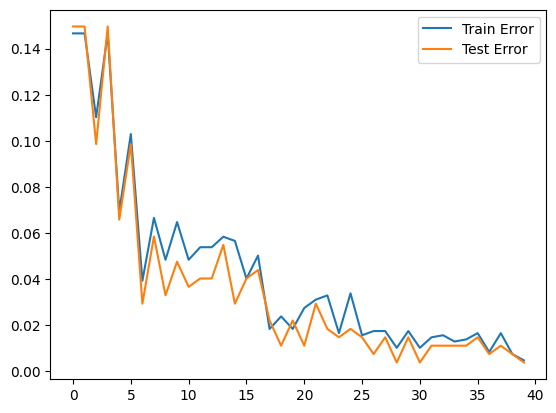

In [31]:
plt.plot(ABC.train_error_hist, label='Train Error')
plt.plot(ABC.cv_error_hist, label='Test Error')
plt.legend()

In [32]:
ABC_train_error = ABC.measure_error(ABC.learners, X_class_train, y_class_train)
ABC_test_error = ABC.measure_error(ABC.learners, X_class_test, y_class_test)

print("% of misclassified examples")
print(f"In train set: {ABC_train_error*100}")
print(f"In test set: {ABC_test_error*100}")

% of misclassified examples
In train set: 0.45537340619307837
In test set: 0.36496350364963503


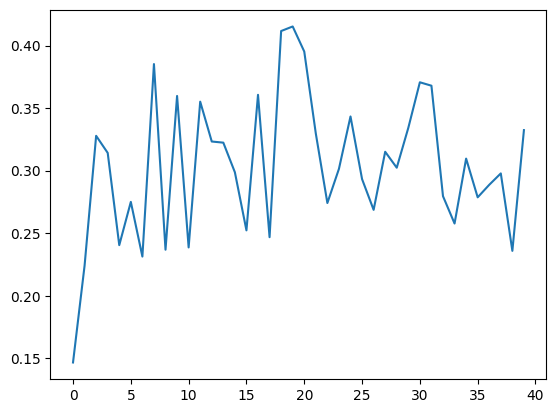

In [39]:
plt.plot(ABC.total_error_hist)

### GradientBoost

In [27]:
GBC = GradientBoostClassifier(X_class_train, y_class_train)

In [29]:
GBC.train(learning_rate=0.1, n_trees=100, max_depth=5, store_hist=True, X_cv=X_class_test, y_cv=y_class_test)

Buidling tree: 1....
Buidling tree: 2....
Buidling tree: 3....
Buidling tree: 4....
Buidling tree: 5....
Buidling tree: 6....
Buidling tree: 7....
Buidling tree: 8....
Buidling tree: 9....
Buidling tree: 10....
Buidling tree: 11....
Buidling tree: 12....
Buidling tree: 13....
Buidling tree: 14....
Buidling tree: 15....
Buidling tree: 16....
Buidling tree: 17....
Buidling tree: 18....
Buidling tree: 19....
Buidling tree: 20....
Buidling tree: 21....
Buidling tree: 22....
Buidling tree: 23....
Buidling tree: 24....
Buidling tree: 25....
Buidling tree: 26....
Buidling tree: 27....
Buidling tree: 28....
Buidling tree: 29....
Buidling tree: 30....
Buidling tree: 31....
Buidling tree: 32....
Buidling tree: 33....
Buidling tree: 34....
Buidling tree: 35....
Buidling tree: 36....
Buidling tree: 37....
Buidling tree: 38....
Buidling tree: 39....
Buidling tree: 40....
Buidling tree: 41....
Buidling tree: 42....
Buidling tree: 43....
Buidling tree: 44....
Buidling tree: 45....
Buidling tree: 46..

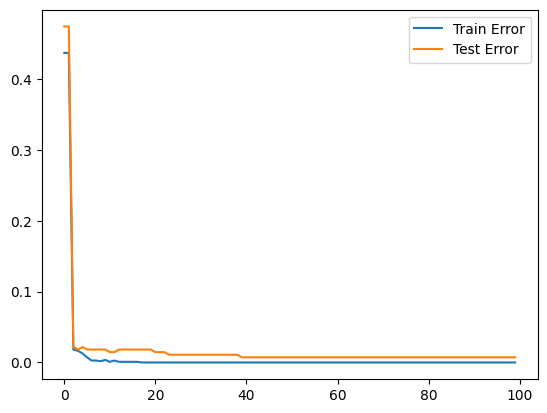

In [30]:
plt.plot(GBC.train_error_hist, label='Train Error')
plt.plot(GBC.cv_error_hist, label="Test Error")
plt.legend()

The above graph shows the mean difference between actual and predicted probabilities

In [31]:
GBC_train_error = GBC.measure_error(X_class_train, y_class_train, GBC.trees, error_type=2)
GBC_test_error = GBC.measure_error(X_class_test, y_class_test, GBC.trees, error_type=2)

print("% of misclassified examples")
print(f"In train set: {GBC_train_error*100}")
print(f"In test set: {GBC_test_error*100}")

% of misclassified examples
In train set: 0.0
In test set: 0.7299270072992701
